# Construyendo una red neuronal desde cero con Numpy

En esta sección vamos a utilizar nuestro conocimiento sobre Numpy para construir una red neuronal desde cero. Para ello primero veremos qué es y como implementar un perceptrón o neurona artifical, luego capas de neuronal y finalmente una red neuronal al completo. Utilizaremos un dataset de prueba obtenido a través de `sklearn.datasets.make_circles` para resolver un problema de clasificación de puntos en el plano. 

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
plt.style.use("seaborn-whitegrid")
%config matplotlib.inLineBackend = "retina"

---
## El perceptrón

In [13]:
class Perceptron: 
    
    def __init__(self, n_conn, act_f):
        self.act_f = act_f
        self.b = rng.random()*2 - 1
        self.W = rng.random(n_conn)*2 - 1

    def forward(self, X):
        if X.shape[-1] != self.W.shape[0]:
            raise ValueError("Estructura de los datos entrada inadecuada.")
        Z = X @ self.W + self.b
        A = self.act_f[0](Z)
        return A

In [17]:
# testeo clase perceptron
perceptron = Perceptron(2, sigmoid)
out = perceptron.forward(X)
print(out.shape)

(500,)


---
## Red Neuronal

In [19]:
n = 500

X, y = make_circles(n_samples=n, factor=0.7, noise=0.05)
rng = np.random.default_rng()

X = X.T
y = y[np.newaxis, :]


# activation functions
sigmoid = (
    lambda x: 1 / (1 + np.exp(-x)), 
    lambda x: x*(1 - x)
)

relu = (
    lambda x: np.maximum(0, x), 
    lambda x: np.where(x < 0, 0, 1)
)

# funciones de coste 
l2 = (
    lambda y, y_hat: np.mean((y - y_hat)**2), 
    lambda y, y_hat: y - y_hat
)

In [22]:
(X.shape, y.shape)

((2, 500), (1, 500))

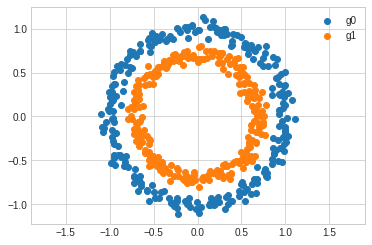

In [29]:
fig, ax = plt.subplots()

is_g0 = (y == 0)[0]

ax.scatter(X[0, is_g0], X[1, is_g0], label="g0")
ax.scatter(X[0, ~is_g0], X[1, ~is_g0], label="g1")
ax.axis("equal")

ax.legend()

fig.show()

In [31]:
W = np.arange(12).reshape((3, 4))
X = np.arange(20).reshape((4, 5))
b = np.ones(3)

ret = W @ X + b[:, np.newaxis]

In [37]:
class NeuralLayer:
    
    def __init__(self, n_neur, n_conn, act_f):
        self.act_f = act_f
        self.b = rng.random(n_neur)*2 - 1
        self.W = rng.random((n_neur, n_conn))*2 - 1

    def forward(self, X):
        return self.act_f[0](self.W @ X + self.b[:, np.newaxis])

    def gradient_descend(self, dW, db, eta):
        self.W = self.W - eta*dW
        self.b = self.b - eta*db

neural_layer = NeuralLayer(n_conn=3, n_neur=10, act_f=sigmoid)
X_test = rng.random((3, 100))
out = neural_layer.forward(X_test)
out.shape

(10, 100)

In [35]:
neural_layer = NeuralLayer(n_conn=3, n_neur=10, act_f=sigmoid)

In [26]:
neural_layer.forward(x)

array([0.7493048 , 0.28602723, 0.62230922, 0.7418222 , 0.64622495,
       0.68592674, 0.26362549, 0.63630328, 0.29936075, 0.7102037 ])